<a href="https://colab.research.google.com/github/Rishikakumari2000/Python-for-everybody/blob/main/Visitors_Exploratory_Data_Analysis_for_Telangana_Government_Tourism_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
sns.set(color_codes=True)

In [ ]:
df1 = pd.read_csv("domestic_visitors_2019.csv")
# To display the top 5 rows
df1.head(10)

,district,date,month,year,visitors
0,Adilabad,01-01-2019,January,2019,25071
1,Adilabad,01-02-2019,February,2019,406177
2,Adilabad,01-03-2019,March,2019,14347
3,Adilabad,01-04-2019,April,2019,9972
4,Adilabad,01-05-2019,May,2019,6997
5,Adilabad,01-06-2019,June,2019,9161
6,Adilabad,01-07-2019,July,2019,11791
7,Adilabad,01-08-2019,August,2019,108173
8,Adilabad,01-09-2019,September,2019,37589
9,Adilabad,01-10-2019,October,2019,38184


In [ ]:
df2 = pd.read_csv("domestic_visitors_2018.csv")
# To display the first 5 rows
df2.head(5)

,district,date,month,year,visitors
0,Adilabad,01-01-2018,January,2018,320356
1,Adilabad,01-02-2018,February,2018,36550
2,Adilabad,01-03-2018,March,2018,23011
3,Adilabad,01-04-2018,April,2018,14183
4,Adilabad,01-05-2018,May,2018,8197


In [ ]:
df3 = pd.read_csv("domestic_visitors_2017.csv")
# To display the first 5 rows
df3.head(5)

,district,date,month,year,visitors
0,Adilabad,01-01-2017,January,2017,318799
1,Adilabad,01-02-2017,February,2017,83316
2,Adilabad,01-03-2017,March,2017,27508
3,Adilabad,01-04-2017,April,2017,13946
4,Adilabad,01-05-2017,May,2017,11752


In [ ]:
df4 = pd.read_csv("domestic_visitors_2016.csv")
# To display the last 5 rows
df4.head(5)

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887


In [ ]:
print(df1.info())
print(df2.info())
print(df3.info())
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  396 non-null    object
 1   date      396 non-null    object
 2   month     396 non-null    object
 3   year      396 non-null    int64 
 4   visitors  378 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  372 non-null    object
 1   date      372 non-null    object
 2   month     372 non-null    object
 3   year      372 non-null    int64 
 4   visitors  360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  -

In [ ]:
df1['visitors'] = pd.to_numeric(df1['visitors'], errors='coerce')
df2['visitors'] = pd.to_numeric(df2['visitors'], errors='coerce')
df3['visitors'] = pd.to_numeric(df3['visitors'], errors='coerce')
df4['visitors'] = pd.to_numeric(df4['visitors'], errors='coerce')
df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  396 non-null    object 
 1   date      396 non-null    object 
 2   month     396 non-null    object 
 3   year      396 non-null    int64  
 4   visitors  342 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 15.6+ KB


In [ ]:
df1.dropna(subset=['visitors'], inplace=True)
df2.dropna(subset=['visitors'], inplace=True)
df3.dropna(subset=['visitors'], inplace=True)
df4.dropna(subset=['visitors'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  342 non-null    object 
 1   date      342 non-null    object 
 2   month     342 non-null    object 
 3   year      342 non-null    int64  
 4   visitors  342 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.0+ KB


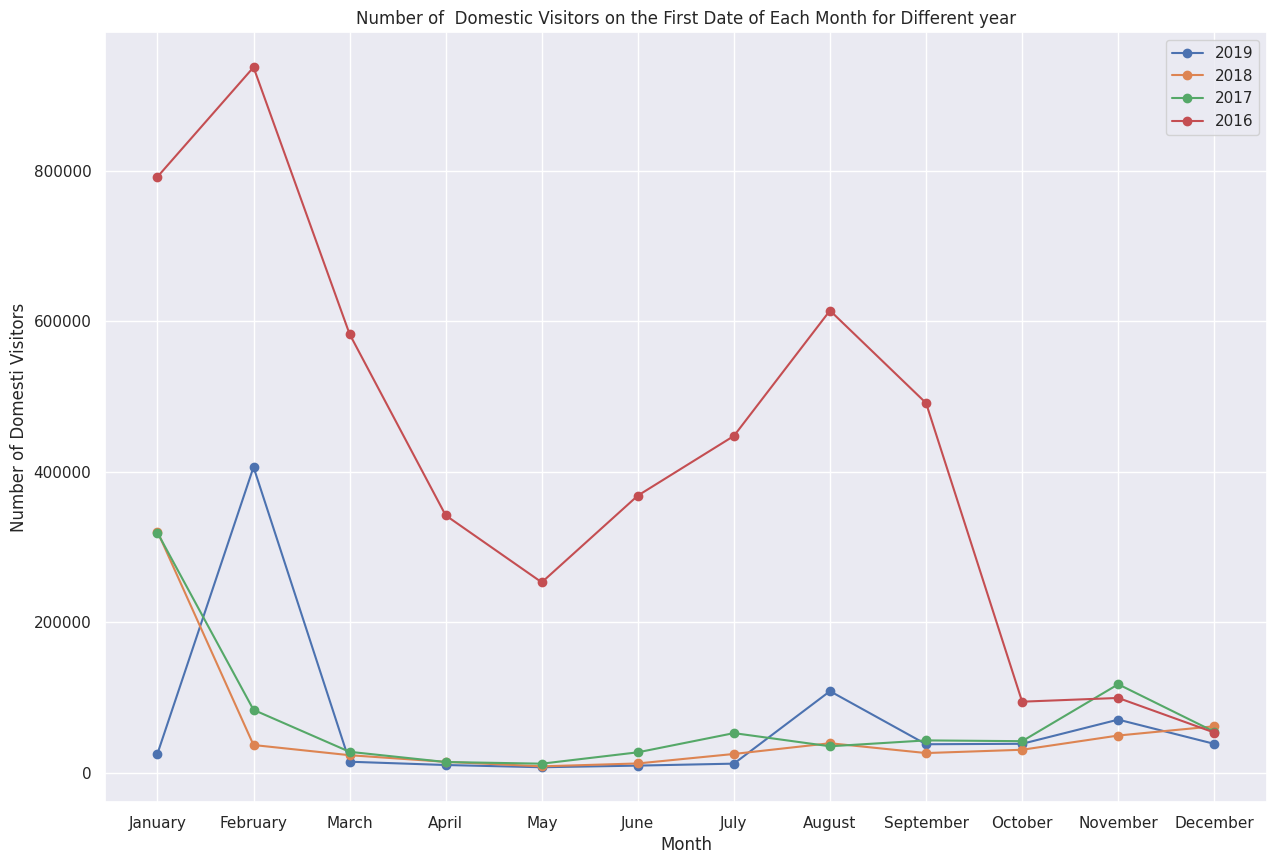

In [ ]:
# Convert 'date' column to datetime format with dayfirst=True
df1['date'] = pd.to_datetime(df1['date'], format='%d-%m-%Y', dayfirst=True)
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y', dayfirst=True)
df3['date'] = pd.to_datetime(df3['date'], format='%d-%m-%Y', dayfirst=True)
df4['date'] = pd.to_datetime(df4['date'], format='%d-%m-%Y', dayfirst=True)

# Group the data by month and select the first entry of each month for all datasets
first_date_visitors_df1 = df1.groupby(df1['date'].dt.month)['visitors'].first()
first_date_visitors_df2 = df2.groupby(df2['date'].dt.month)['visitors'].first()
first_date_visitors_df3 = df3.groupby(df3['date'].dt.month)['visitors'].first()
first_date_visitors_df4 = df4.groupby(df4['date'].dt.month)['visitors'].first()

# Plotting the data
plt.figure(figsize=(15, 10))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.plot(months, first_date_visitors_df1.values, label='2019', marker='o')
plt.plot(months, first_date_visitors_df2.values, label='2018', marker='o')
plt.plot(months, first_date_visitors_df3.values, label='2017', marker='o')
plt.plot(months, first_date_visitors_df4.values, label='2016', marker='o')

plt.xlabel('Month')
plt.ylabel('Number of Domesti Visitors')
plt.title('Number of  Domestic Visitors on the First Date of Each Month for Different year')
plt.legend()
plt.grid(True)
plt.show()






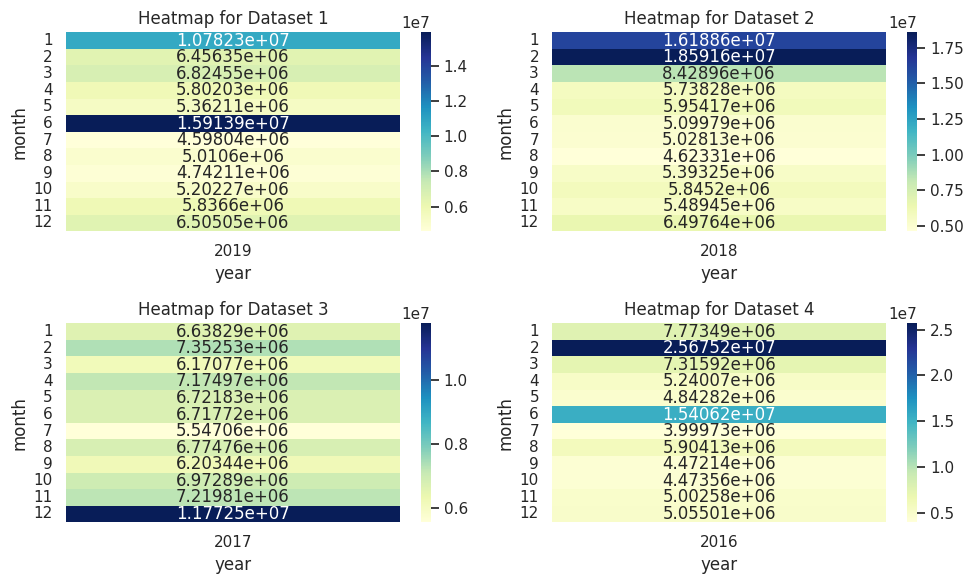

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into the DataFrames df1, df2, df3, and df4.

# Convert 'date' column to datetime format with dayfirst=True
df1['date'] = pd.to_datetime(df1['date'], format='%d-%m-%Y', dayfirst=True)
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y', dayfirst=True)
df3['date'] = pd.to_datetime(df3['date'], format='%d-%m-%Y', dayfirst=True)
df4['date'] = pd.to_datetime(df4['date'], format='%d-%m-%Y', dayfirst=True)

# Create a new column for the year
df1['year'] = df1['date'].dt.year
df2['year'] = df2['date'].dt.year
df3['year'] = df3['date'].dt.year
df4['year'] = df4['date'].dt.year

# Create a new column for the month
df1['month'] = df1['date'].dt.month
df2['month'] = df2['date'].dt.month
df3['month'] = df3['date'].dt.month
df4['month'] = df4['date'].dt.month

# Pivot the data to have months as rows and years as columns for each dataset
heatmap_df1 = df1.pivot_table(index='month', columns='year', values='visitors', aggfunc='sum')
heatmap_df2 = df2.pivot_table(index='month', columns='year', values='visitors', aggfunc='sum')
heatmap_df3 = df3.pivot_table(index='month', columns='year', values='visitors', aggfunc='sum')
heatmap_df4 = df4.pivot_table(index='month', columns='year', values='visitors', aggfunc='sum')

# Plotting the heatmap for each dataset
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.heatmap(heatmap_df1, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap for Dataset 1')

plt.subplot(2, 2, 2)
sns.heatmap(heatmap_df2, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap for Dataset 2')

plt.subplot(2, 2, 3)
sns.heatmap(heatmap_df3, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap for Dataset 3')

plt.subplot(2, 2, 4)
sns.heatmap(heatmap_df4, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap for Dataset 4')

plt.tight_layout()
plt.show()


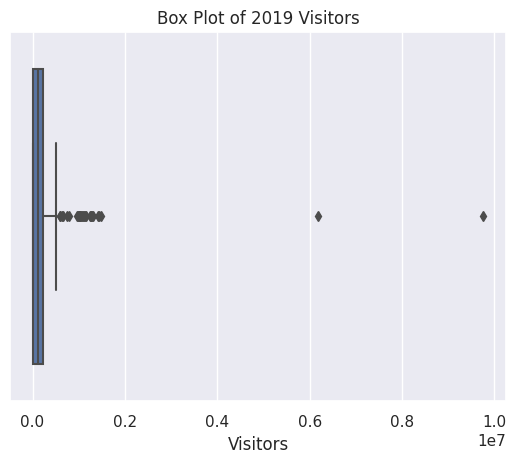

In [ ]:
df1['visitors'] = pd.to_numeric(df1['visitors'], errors='coerce')

# Create the box plot for the 'visitors' column
sns.boxplot(x=df1['visitors'], orient='h')

# Optionally, you can set labels and titles for the plot
plt.xlabel('Visitors')
plt.title('Box Plot of 2019 Visitors')
plt.show()

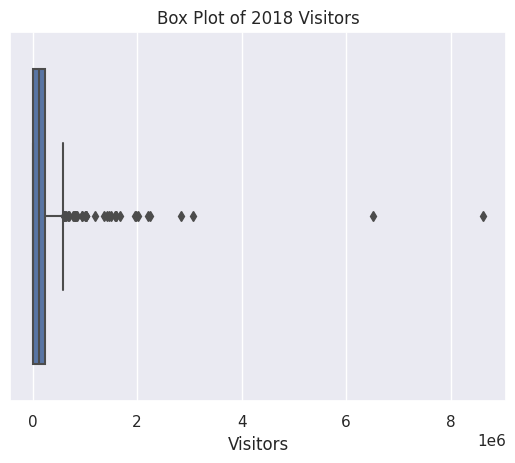

In [ ]:
df2['visitors'] = pd.to_numeric(df2['visitors'], errors='coerce')

# Create the box plot for the 'visitors' column
sns.boxplot(x=df2['visitors'], orient='h')

# Optionally, you can set labels and titles for the plot
plt.xlabel('Visitors')
plt.title('Box Plot of 2018 Visitors')
plt.show()

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

month            6.0
year             0.0
visitors    220024.5
dtype: float64


<ipython-input-135-e6163f9c21b2>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-135-e6163f9c21b2>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)


In [ ]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR2 = Q3 - Q1
print(IQR2)

month            5.50
year             0.00
visitors    233513.75
dtype: float64


<ipython-input-136-3e505ae0884a>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df2.quantile(0.25)
<ipython-input-136-3e505ae0884a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df2.quantile(0.75)


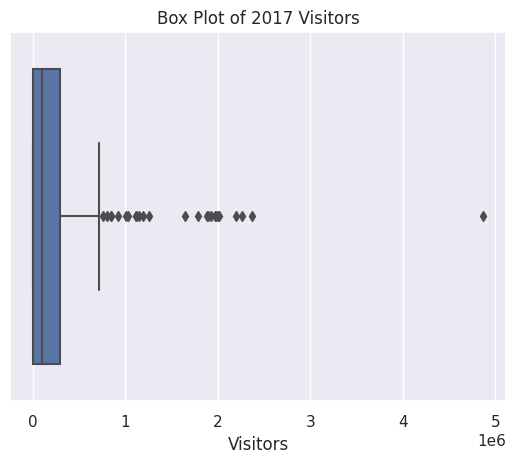

month            5.5
year             0.0
visitors    285811.0
dtype: float64


<ipython-input-137-603a2092f3df>:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df3.quantile(0.25)
<ipython-input-137-603a2092f3df>:11: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df3.quantile(0.75)


In [ ]:
df3['visitors'] = pd.to_numeric(df3['visitors'], errors='coerce')

# Create the box plot for the 'visitors' column
sns.boxplot(x=df3['visitors'], orient='h')

# Optionally, you can set labels and titles for the plot
plt.xlabel('Visitors')
plt.title('Box Plot of 2017 Visitors')
plt.show()
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR3 = Q3 - Q1
print(IQR3)

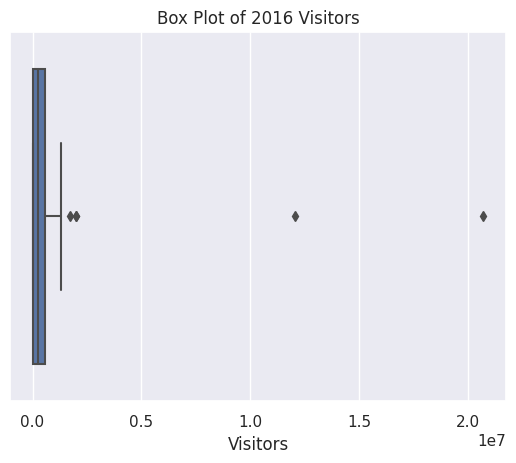

month            6.0
year             0.0
visitors    564598.0
dtype: float64


<ipython-input-138-6ead613217d3>:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df4.quantile(0.25)
<ipython-input-138-6ead613217d3>:11: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df4.quantile(0.75)


In [ ]:
df4['visitors'] = pd.to_numeric(df4['visitors'], errors='coerce')

# Create the box plot for the 'visitors' column
sns.boxplot(x=df4['visitors'], orient='h')

# Optionally, you can set labels and titles for the plot
plt.xlabel('Visitors')
plt.title('Box Plot of 2016 Visitors')
plt.show()
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR4 = Q3 - Q1
print(IQR4)

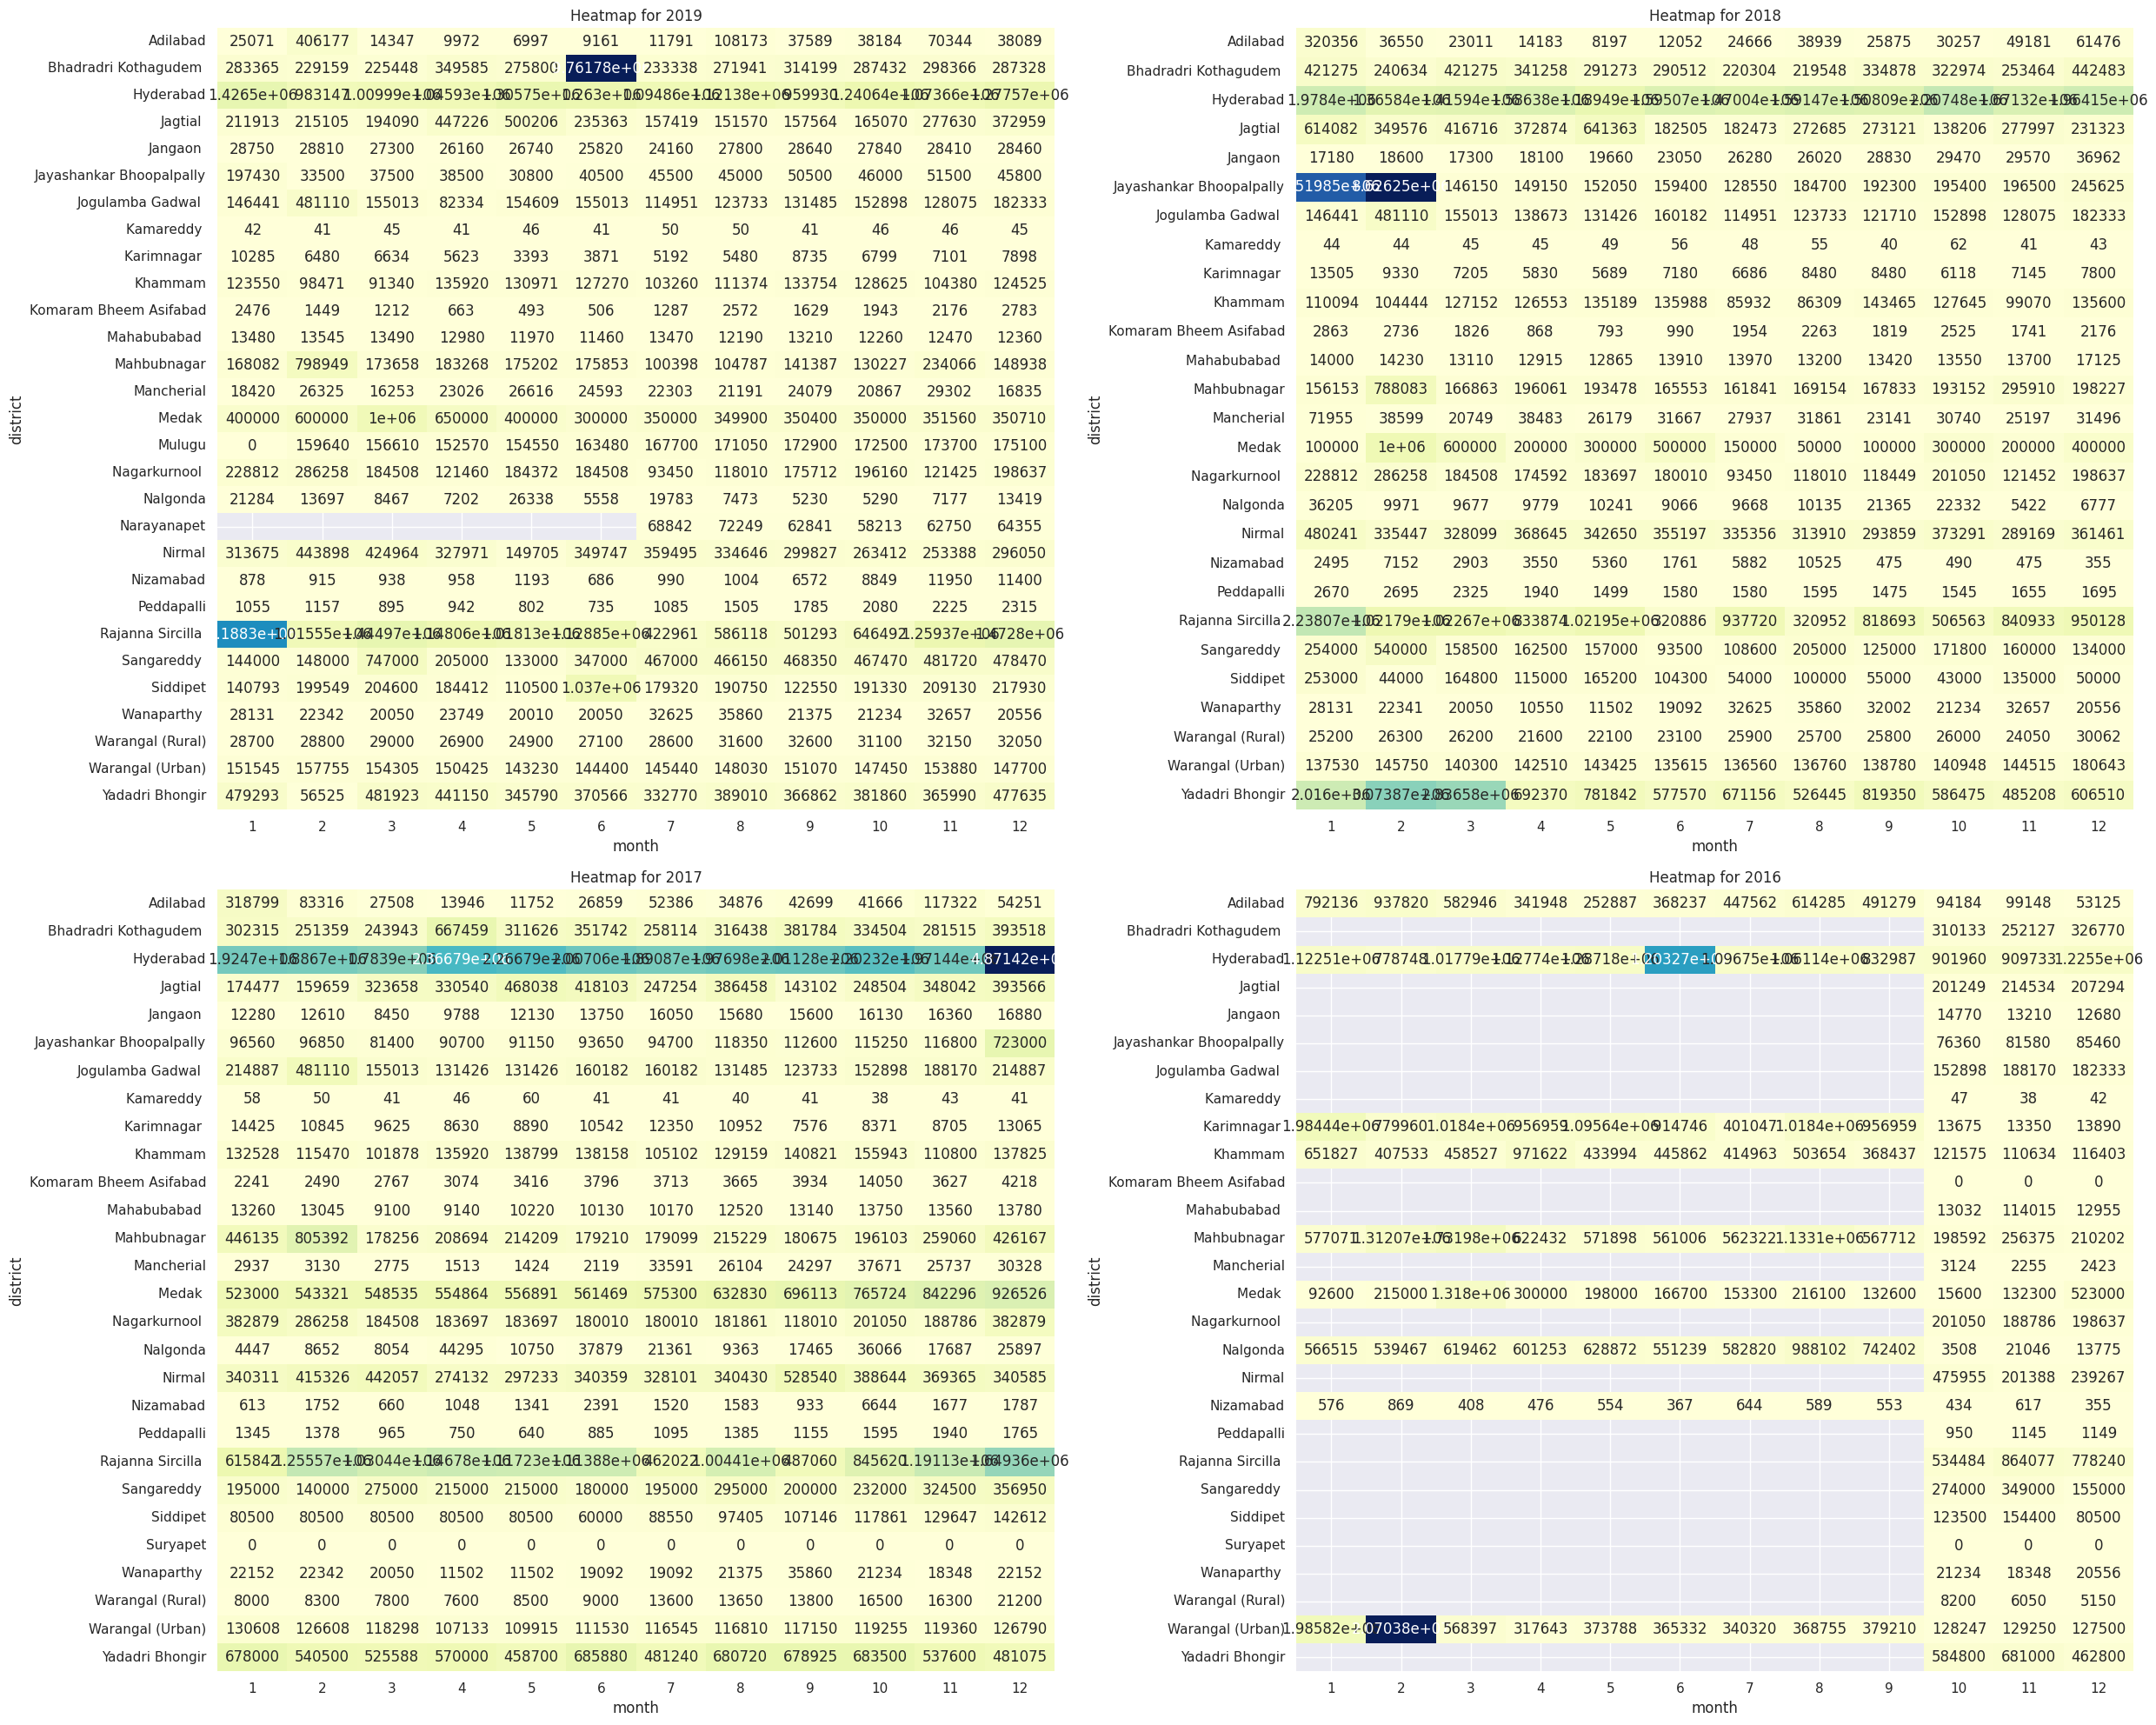

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into the DataFrames df1, df2, df3, and df4.

# Convert 'date' column to datetime format with dayfirst=True
df1['date'] = pd.to_datetime(df1['date'], format='%d-%m-%Y', dayfirst=True)
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y', dayfirst=True)
df3['date'] = pd.to_datetime(df3['date'], format='%d-%m-%Y', dayfirst=True)
df4['date'] = pd.to_datetime(df4['date'], format='%d-%m-%Y', dayfirst=True)

# Create a new column for the year
df1['year'] = df1['date'].dt.year
df2['year'] = df2['date'].dt.year
df3['year'] = df3['date'].dt.year
df4['year'] = df4['date'].dt.year

# Create a new column for the month
df1['month'] = df1['date'].dt.month
df2['month'] = df2['date'].dt.month
df3['month'] = df3['date'].dt.month
df4['month'] = df4['date'].dt.month

# Pivot the data to have districts as rows and months as columns for each dataset
heatmap_df1 = df1.pivot_table(index='district', columns='month', values='visitors', aggfunc='sum')
heatmap_df2 = df2.pivot_table(index='district', columns='month', values='visitors', aggfunc='sum')
heatmap_df3 = df3.pivot_table(index='district', columns='month', values='visitors', aggfunc='sum')
heatmap_df4 = df4.pivot_table(index='district', columns='month', values='visitors', aggfunc='sum')

# Plotting the heatmap for each dataset
plt.figure(figsize=(25, 20))

plt.subplot(2, 2, 1)
sns.heatmap(heatmap_df1, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Heatmap for 2019')

plt.subplot(2, 2, 2)
sns.heatmap(heatmap_df2, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Heatmap for 2018')

plt.subplot(2, 2, 3)
sns.heatmap(heatmap_df3, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Heatmap for 2017')

plt.subplot(2, 2, 4)
sns.heatmap(heatmap_df4, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Heatmap for 2016')

plt.tight_layout()
plt.show()


In [ ]:
# Assuming you have already loaded the data into the DataFrames df1, df2, df3, and df4.

# Calculate the total number of visitors for each district in each dataset
top_districts_df1 = df1.groupby('district')['visitors'].sum().reset_index()
top_districts_df2 = df2.groupby('district')['visitors'].sum().reset_index()
top_districts_df3 = df3.groupby('district')['visitors'].sum().reset_index()
top_districts_df4 = df4.groupby('district')['visitors'].sum().reset_index()

# Sort the districts in descending order based on the number of visitors and select the top 15
top_districts_df1 = top_districts_df1.nlargest(15, 'visitors')
top_districts_df2 = top_districts_df2.nlargest(15, 'visitors')
top_districts_df3 = top_districts_df3.nlargest(15, 'visitors')
top_districts_df4 = top_districts_df4.nlargest(15, 'visitors')

# Print the top 15 districts for each dataset
print("Top 15 districts in 2019:")
print(top_districts_df1)

print("\nTop 15 districts in 2018:")
print(top_districts_df2)

print("\nTop 15 districts in 2017:")
print(top_districts_df3)

print("\nTop 15 districts in 2016:")
print(top_districts_df4)


Top 15 districts in 2019:
                 district    visitors
22      Rajanna Sircilla   16832897.0
2               Hyderabad  13802362.0
1   Bhadradri Kothagudem   12817737.0
14                 Medak    5452570.0
23            Sangareddy    4553160.0
28        Yadadri Bhongir   4489374.0
19                 Nirmal   3816778.0
3                Jagtial    3086115.0
24               Siddipet   2987864.0
12            Mahbubnagar   2534815.0
16          Nagarkurnool    2093312.0
6       Jogulamba Gadwal    2007995.0
15                 Mulugu   1819800.0
27       Warangal (Urban)   1795230.0
9                 Khammam   1413440.0

Top 15 districts in 2018:
                    district    visitors
2                  Hyderabad  19543651.0
5   Jayashankar Bhoopalpally  16895925.0
26           Yadadri Bhongir  13673378.0
20         Rajanna Sircilla   10834231.0
17                    Nirmal   4177325.0
3                   Jagtial    3952921.0
14                    Medak    3900000.0
1      Bhad

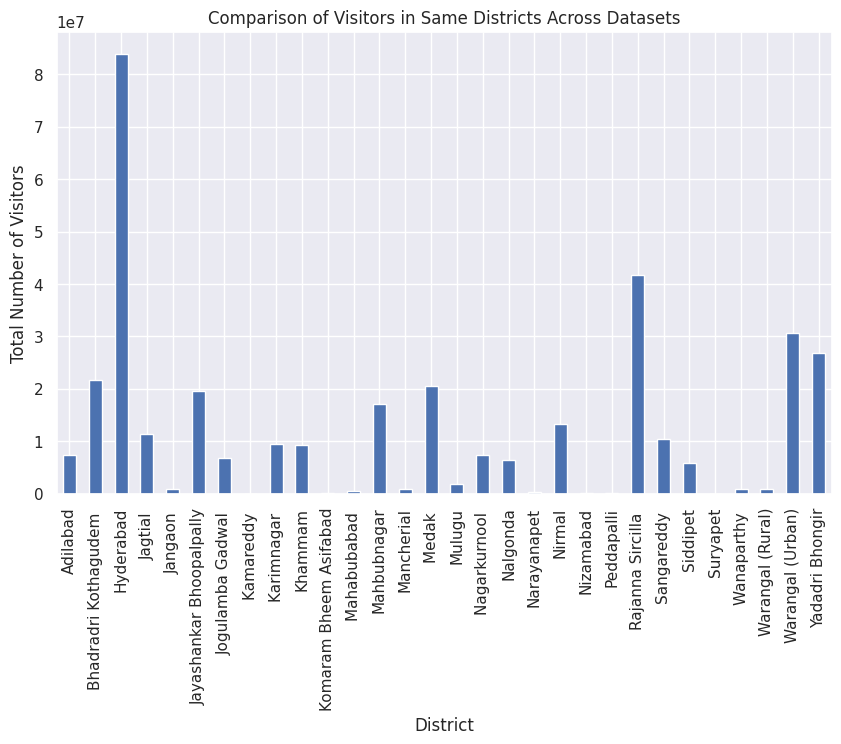

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into the DataFrames df1, df2, df3, and df4.

# Concatenate the four datasets vertically to create a combined DataFrame
combined_df = pd.concat([df1, df2, df3, df4])

# Group the data by district and calculate the total number of visitors for each district
district_visitors = combined_df.groupby('district')['visitors'].sum()

# Plot the bar plot to compare the number of visitors in the same districts across datasets
plt.figure(figsize=(10, 6))
district_visitors.plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Total Number of Visitors')
plt.title('Comparison of Visitors in Same Districts Across Datasets')
plt.grid(True)
plt.show()


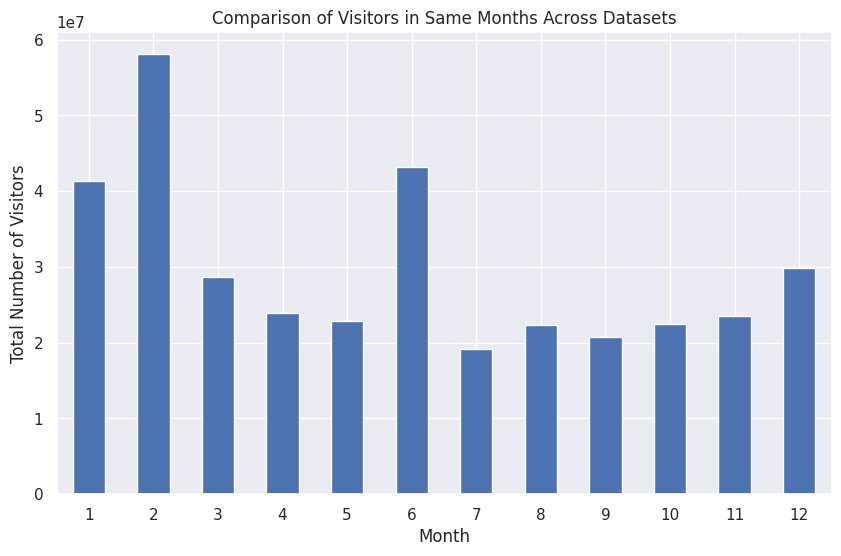

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into the DataFrames df1, df2, df3, and df4.

# Concatenate the four datasets vertically to create a combined DataFrame
combined_df = pd.concat([df1, df2, df3, df4])

# Convert the 'date' column to datetime format with dayfirst=True
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%d-%m-%Y', dayfirst=True)

# Extract the month from the 'date' column and create a new 'month' column
combined_df['month'] = combined_df['date'].dt.month

# Group the data by month and calculate the total number of visitors for each month
month_visitors = combined_df.groupby('month')['visitors'].sum()

# Plot the bar plot to compare the number of visitors in the same months across datasets
plt.figure(figsize=(10, 6))
month_visitors.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Number of Visitors')
plt.title('Comparison of Visitors in Same Months Across Datasets')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [ ]:


# Assuming you have already loaded the data into the DataFrames df1, df2, df3, and df4.

# Concatenate the four datasets vertically to create a combined DataFrame
combined_df = pd.concat([df1, df2, df3, df4])


# Group the data by district and calculate the total number of domestic visitors for each district
district_domestic_visitors =combined_df.groupby('district')['visitors'].sum()

# Sort the districts based on the total number of domestic visitors in descending order
sorted_districts = district_domestic_visitors.sort_values(ascending=False)

# Select the top 10 districts
top_10_districts = sorted_districts.head(10)

print(top_10_districts)


district
Hyderabad                   83900960.0
Rajanna Sircilla            41763276.0
Warangal (Urban)            30726603.0
Yadadri Bhongir             26893080.0
Bhadradri Kothagudem        21600962.0
Medak                       20542639.0
Jayashankar Bhoopalpally    19632865.0
Mahbubnagar                 17180118.0
Nirmal                      13315796.0
Jagtial                     11303514.0
Name: visitors, dtype: float64
